In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model  # Import the Model class from Keras

In [2]:
# # import numpy as np

# # # Try loading the file as a numpy array with the expected data type
# # data = np.fromfile('datasets/faces_emore/lfw.bin', dtype=np.float32)

# # if data.size == 0:
# #     print("The .bin file is empty.")
# # else:
# #     print(f"The .bin file contains {data.size} elements.")


# import numpy as np

# # Load the .bin file as embeddings
# embeddings = np.fromfile('datasets/faces_emore/lfw.bin', dtype=np.float32)

# # Print the total number of elements
# print(f"Total number of elements: {embeddings.size}")

# # Adjust the number of elements to be divisible by 128 (embedding dimension)
# embedding_size = 128
# num_elements = (embeddings.size // embedding_size) * embedding_size  # Round down to nearest multiple of 128

# # Slice the array to ensure it's divisible by 128
# embeddings = embeddings[:num_elements]

# # Reshape the embeddings
# N = embeddings.size // embedding_size  # Number of samples
# embeddings = embeddings.reshape((N, embedding_size))

# print(f"Reshaped embeddings to: {embeddings.shape}")



In [3]:
import os
import sys
import numpy as np
import tensorflow as tf

weights_file = "./checkpoints/ghostnetv1_w1.3_s1.weights.weights.h5"  # Adjust the path if necessary

# Add the path to the 'backbones' folder to the system path
sys.path.append(os.path.abspath('./backbones'))

# Import the GhostNet architecture
from ghost_model import GhostNet

# Define paths


# Model parameters
input_shape = (224, 224, 3)  # Adjust this based on your input size
num_classes = 10           # Adjust this based on your dataset, set to 0 if not including top layer

# Initialize model as None
model = None

# Instantiate the GhostNet model
try:
    # Create the model directly with input_shape
    model = GhostNet(
        input_shape=input_shape,  # Input shape is used directly
        include_top=False,         # Set to False if you're using it as a feature extractor
        classes=num_classes,      # Number of output classes
        width=1.0,
        strides=1,                                 # Width multiplier as specified in the model
        name="GhostNet"         # Optional name for the model
    )
    print("GhostNetV1 model instantiated successfully!")
except Exception as e:
    print(f"Error instantiating GhostNetV1 model: {e}")

# Check if the model was successfully created
if model is not None:
    # Load pre-trained weights
    try:
        model.load_weights(weights_file)
        print("Weights loaded successfully from:", weights_file)
    except Exception as e:
        print(f"Error loading weights: {e}")

    # Compile the model (if necessary)
    try:
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print("Model compiled successfully!")
    except Exception as e:
        print(f"Error compiling the model: {e}")

    # Check the model summary
    print("Model Summary:")
    model.summary()

GhostNetV1 model instantiated successfully!
Weights loaded successfully from: ./checkpoints/ghostnetv1_w1.3_s1.weights.weights.h5
Model compiled successfully!
Model Summary:


Model: "GhostNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        432 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │        128 │ activation[0][0]  │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         32 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d    │ (None, 224, 224,  │         72 │ activation_1[0][… │
│ (DepthwiseConv2D)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         32 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 224, 224,  │          0 │ activation_1[0][… │
│ (Concatenate)       │ 16)               │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 224, 224,  │        128 │ concatenate[0][0] │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         32 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_1  │ (None, 224, 224,  │         72 │ batch_normalizat… │
│ (DepthwiseConv2D)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         32 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Concatenate)       │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ activation[0][0]

 Total params: 2,214,148 (8.45 MB)

 Trainable params: 2,193,972 (8.37 MB)

 Non-trainable params: 20,176 (78.81 KB)

In [4]:
# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image to match the model's input requirements.
    
    Args:
    - image_path (str): Path to the image file.
    - target_size (tuple): Target size of the image (default is (112, 112)).
    
    Returns:
    - np.array: Preprocessed image array.
    """
    img = load_img(image_path, target_size=target_size, color_mode="rgb")
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array




# Function to compute similarity score
def compute_similarity(embedding1, embedding2):
    """
    Compute the similarity score between two embeddings using cosine similarity.
    
    Args:
    - embedding1 (np.array): Embedding of the first image.
    - embedding2 (np.array): Embedding of the second image.
    
    Returns:
    - float: Cosine similarity score.
    """
    # Remove singleton dimensions (shape like (1, 1, 1, 1000) -> (1000,))
    embedding1 = np.squeeze(embedding1)
    embedding2 = np.squeeze(embedding2)
    embedding1 = embedding1.flatten()
    embedding2 = embedding2.flatten()
    
    # Compute cosine similarity
    dot_product = np.dot(embedding1, embedding2)
    norm1 = np.linalg.norm(embedding1)
    norm2 = np.linalg.norm(embedding2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the test images
image1_path = "./test_images/2_1.jpg"
image2_path = "./test_images/12_5.jpg"
# Load and display an image
# image = mpimg.imread(image_path)

# plt.imshow(image)
# plt.axis('off')  # Hide axes for better display
# plt.show()


In [62]:


# Preprocess the images
image1 = preprocess_image(image1_path)
image2 = preprocess_image(image2_path)

# Extract embeddings using the model
embedding1 = model.predict(image1)
embedding2 = model.predict(image2)
print("Embeddings shape:", embedding1.shape, embedding2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Embeddings shape: (1, 14, 14, 512) (1, 14, 14, 512)


./test_images/2_1.jpg
Cow No. 2


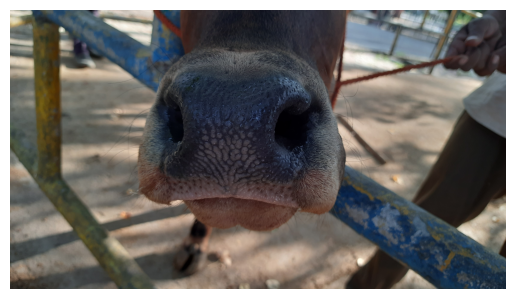

./test_images/12_5.jpg
Cow No. 12


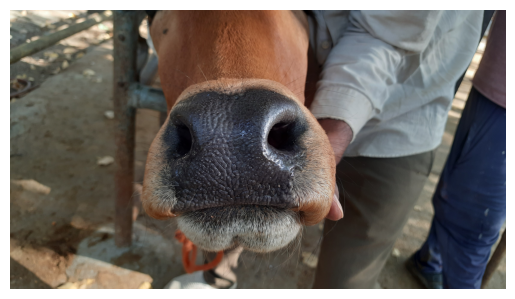

The images are not similar.


In [63]:
# Compute similarity score
similarity_score = compute_similarity(embedding1, embedding2)

# Threshold for determining if the images are the same
threshold = 0.85  # Adjust based on your training
# print(f"Similarity Score: {similarity_score:.2f}")

img1 = mpimg.imread(image1_path)
img2 = mpimg.imread(image2_path)

print(image1_path)
print("Cow No.", 2)
plt.imshow(img1)
# plt.imshow(img2)
plt.axis('off')  # Hide axes for better display
plt.show()

print(image2_path)
print("Cow No.", 12)
plt.imshow(img2)
plt.axis('off')  # Hide axes for better display
plt.show()

# Output the result
if similarity_score >= threshold:
    print("The images are similar.")
else:
    print("The images are not similar.")

In [13]:

# import os
# import numpy as np

# # def get_image_paths(base_dir):
# #     """
# #     Get all image file paths from subfolders in the base directory.
# #     """
# #     image_paths = []
# #     subfolders = [os.path.join(base_dir, folder) for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]
# #     for subfolder in subfolders:
# #         images = [os.path.join(subfolder, img) for img in os.listdir(subfolder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
# #         image_paths.extend(images)
# #     return image_paths

# # # Define the base directory
# # base_dir = "./test_images/Cows_images"
# # print(get_image_paths(base_dir))

# def map_image_to_index(image_path):
#     """
#     Map the image path to an index number as described in the format:
#     Folder 0: 0_1.jpg -> index 0, 0_2.jpg -> index 1, ..., 0_10.jpg -> index 9
#     Folder 1: 1_1.jpg -> index 10, 1_2.jpg -> index 11, ..., 1_10.jpg -> index 19
#     """
#     folder_name = os.path.basename(os.path.dirname(image_path))  # Folder name (0, 1, ..., 9)
#     image_name = os.path.basename(image_path)  # Image name (e.g., '0_1.jpg')
    
#     # Extract image index from name (e.g., '0_1' -> index 0, '0_2' -> index 1, ..., '0_10' -> index 9)
#     image_index = int(image_name.split('_')[1].split('.')[0])  # Extract the number after '_'
    
#     # Calculate the global index based on folder and image index
#     global_index = int(folder_name) * 10 + image_index
#     return global_index

# print(map_image_to_index("./test_images/Cows_images/4/4_10.jpg"))  # Expected output: 0

In [38]:
import os
import numpy as np

# Directory containing the folders with images
base_dir = "./test_images/cows_images"

# Output file to save results
output_file = "./Results/similarity_results_matrix.txt"

# Threshold for similarity (adjust as needed)
threshold = 0.85

In [34]:


# Function to list all image paths in the folders
def get_image_paths(base_dir):
    """
    Get all image file paths from subfolders in the base directory.
    """
    image_paths = []
    subfolders = [os.path.join(base_dir, folder) for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]
    for subfolder in subfolders:
        images = [os.path.join(subfolder, img) for img in os.listdir(subfolder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        image_paths.extend(images)
    return image_paths

# Function to compute similarity score
def compute_similarity(embedding1, embedding2):
    """
    Compute the similarity score between two embeddings using cosine similarity.
    """
    # Remove singleton dimensions (shape like (1, 1, 1, 1000) -> (1000,))
    embedding1 = np.squeeze(embedding1)
    embedding2 = np.squeeze(embedding2)
    embedding1 = embedding1.flatten()
    embedding2 = embedding2.flatten()
    
    # Compute cosine similarity
    dot_product = np.dot(embedding1, embedding2)
    norm1 = np.linalg.norm(embedding1)
    norm2 = np.linalg.norm(embedding2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

# Function to map image path to index
def map_image_to_index(image_path):
    """
    Map the image path to an index number as described in the format:
    Folder 0: 0_1.jpg -> index 0, 0_2.jpg -> index 1, ..., 0_10.jpg -> index 9
    Folder 1: 1_1.jpg -> index 10, 1_2.jpg -> index 11, ..., 1_10.jpg -> index 19
    """
    folder_name = os.path.basename(os.path.dirname(image_path))  # Folder name (0, 1, ..., 9)
    image_name = os.path.basename(image_path)  # Image name (e.g., '0_1.jpg')
    
    # Extract image index from name (e.g., '0_1' -> index 0, '0_2' -> index 1, ..., '0_10' -> index 9)
    image_index = int(image_name.split('_')[1].split('.')[0])  # Extract the number after '_'
    
    # Calculate the global index based on folder and image index
    global_index = int(folder_name) * 10 + image_index
    return global_index

In [35]:
# Get all image paths
image_paths = get_image_paths(base_dir)

# Initialize similarity matrix (2D matrix)
# num_images = 100
num_images = len(image_paths)
similarity_matrix = np.zeros((num_images+1, num_images+1))

In [36]:
# Process all pairs and fill similarity matrix
for i in range(num_images):
    for j in range(i + 1, num_images):
        image1_path = image_paths[i]
        image2_path = image_paths[j]
        
        # Preprocess images (you need to define preprocess_image function)
        image1 = preprocess_image(image1_path)
        image2 = preprocess_image(image2_path)
        
        # Get embeddings (you need to define the model for predictions)
        embedding1 = model.predict(image1)
        embedding2 = model.predict(image2)
        
        # Compute similarity
        similarity_score = compute_similarity(embedding1, embedding2)
        
        # Determine similarity result (1 or 0)
        result = 1 if similarity_score >= threshold else 0
        
        # Map the image paths to indices
        index1 = map_image_to_index(image1_path)
        index2 = map_image_to_index(image2_path)
        
        # Store the result in the similarity matrix (symmetric matrix)
        similarity_matrix[index1, index2] = result
        similarity_matrix[index2, index1] = result
        
        print(f"Compared: {image1_path} vs {image2_path} -> Similarity: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Compared: ./test_images/cows_images/9/9_10.jpg vs ./test_images/cows_images/9/9_3.jpg -> Similarity: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Compared: ./test_images/cows_images/9/9_10.jpg vs ./test_images/cows_images/9/9_2.jpg -> Similarity: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Compared: ./test_images/cows_images/9/9_10.jpg vs ./test_images/cows_images/9/9_1.jpg -> Similarity: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Compared: ./test_images/cows_images/9/9_10.jpg vs ./test_images/cows_images/9/9_5.jpg -> Similarity: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Compared: ./test_images/cows_images/9/9_10.jpg vs ./test_images/cows_images/9/9_4.jpg -> Similarity: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Compared: ./test_images/cows_

In [39]:
# Save similarity matrix to a file (optional)
np.savetxt(output_file, similarity_matrix, fmt="%d")

print("Similarity matrix saved to:", output_file)

Similarity matrix saved to: ./Results/similarity_results_matrix.txt
